In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Đọc dữ liệu sơ bộ

In [6]:
df = pd.read_excel("sales_data_sample.xlsx")

df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [8]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

## Tiền xử lý

### Sau khi tìm hiểu dữ liệu, ta thấy có một số đặt trưng không quan trọng (sẽ một một số đặt trưng không mang tính số)

In [17]:
ds = df.drop(["ORDERDATE","STATUS","QTR_ID","MONTH_ID","YEAR_ID","PRODUCTCODE",'CUSTOMERNAME','PHONE','ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'],axis = 1)

ds

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,DEALSIZE
0,10107,30,95.70,2,2871.00,Motorcycles,95,Small
1,10121,34,81.35,5,2765.90,Motorcycles,95,Small
2,10134,41,94.74,2,3884.34,Motorcycles,95,Medium
3,10145,45,83.26,6,3746.70,Motorcycles,95,Medium
4,10159,49,100.00,14,5205.27,Motorcycles,95,Medium
...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,Ships,54,Small
2819,10373,29,100.00,1,3978.51,Ships,54,Medium
2820,10386,43,100.00,4,5417.57,Ships,54,Medium
2821,10397,34,62.24,1,2116.16,Ships,54,Small


### Kiểm tra có missing value không

In [21]:
ds.isnull().values.any()

False

### Set các giá trị cho cột "PRODUCTLINE"

Có nhiều cách để set giá trị, trong trường hợp cột này mình sẽ sử dụng one hot

In [18]:
convert = pd.get_dummies(ds.PRODUCTLINE,prefix = "PRODUCTLINE")

convert

,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2818,0,0,0,1,0,0,0
2819,0,0,0,1,0,0,0
2820,0,0,0,1,0,0,0
2821,0,0,0,1,0,0,0


In [19]:
ds = ds.drop(['PRODUCTLINE'],axis = 1).join(convert)

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ORDERNUMBER                   2823 non-null   int64  
 1   QUANTITYORDERED               2823 non-null   int64  
 2   PRICEEACH                     2823 non-null   float64
 3   ORDERLINENUMBER               2823 non-null   int64  
 4   SALES                         2823 non-null   float64
 5   MSRP                          2823 non-null   int64  
 6   DEALSIZE                      2823 non-null   object 
 7   PRODUCTLINE_Classic Cars      2823 non-null   uint8  
 8   PRODUCTLINE_Motorcycles       2823 non-null   uint8  
 9   PRODUCTLINE_Planes            2823 non-null   uint8  
 10  PRODUCTLINE_Ships             2823 non-null   uint8  
 11  PRODUCTLINE_Trains            2823 non-null   uint8  
 12  PRODUCTLINE_Trucks and Buses  2823 non-null   uint8  
 13  PRO

## Set giá trị cho cột "DEALSIZE"

### Ở đây mình sẽ cho size được set là từ 1 tới 3 tương ứng là small tới large

In [20]:
# Có thể duyệt thủ công hoặc sử dụng pandas như sau
ds.DEALSIZE = ds.DEALSIZE.map({'Small': 1, 'Medium': 2, 'Large': 3})

ds

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MSRP,DEALSIZE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30,95.70,2,2871.00,95,1,0,1,0,0,0,0,0
1,10121,34,81.35,5,2765.90,95,1,0,1,0,0,0,0,0
2,10134,41,94.74,2,3884.34,95,2,0,1,0,0,0,0,0
3,10145,45,83.26,6,3746.70,95,2,0,1,0,0,0,0,0
4,10159,49,100.00,14,5205.27,95,2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,54,1,0,0,0,1,0,0,0
2819,10373,29,100.00,1,3978.51,54,2,0,0,0,1,0,0,0
2820,10386,43,100.00,4,5417.57,54,2,0,0,0,1,0,0,0
2821,10397,34,62.24,1,2116.16,54,1,0,0,0,1,0,0,0


## Train mô hình

### PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5) # Chọn đại :)

x_pca = pca.fit_transform(ds)

x_pca.shape

(2823, 5)

### t-SNE


In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2) # Lại chọn đại :)

x_tsne = tsne.fit_transform(x_pca)

x_tsne.shape

(2823, 2)

### Trực quan hóa

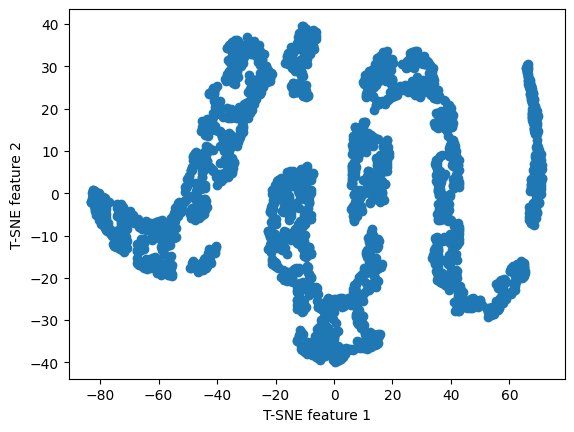

In [26]:
plt.scatter(x_tsne[:,0],x_tsne[:,1])
plt.xlabel('T-SNE feature 1')
plt.ylabel('T-SNE feature 2')
plt.show()

### K-means Clustering

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)

kmeans.fit(x_tsne)

labels = kmeans.predict(x_tsne)

center = kmeans.cluster_centers_

center


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 47.805756  ,   1.0575591 ],
       [-48.915985  ,   4.86533   ],
       [ -0.41753447,  -3.9070725 ]], dtype=float32)

In [31]:
def euclid_distance(a,b):
    return (a[0] - b[0])**2 + (a[1] - b[1])**2

In [42]:
def check_nearly(a,b,c):
    if a == min(a,b,c):
        return 0
    elif b == min(a,b,c):
        return 1
    else:
        return 2

In [43]:
y_pre = []
for i in range(len(x_tsne)):
    a = euclid_distance(x_tsne[i],center[0])
    b = euclid_distance(x_tsne[i],center[1])
    c = euclid_distance(x_tsne[i],center[2])
    y_pre.append(check_nearly(a,b,c))

y_pre = np.asarray(y_pre).reshape(-1,1)

y_pre


array([[2],
       [2],
       [2],
       ...,
       [0],
       [1],
       [2]])

### Trực quan hóa

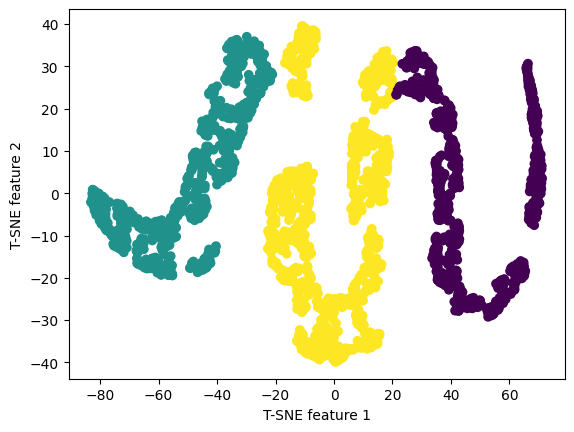

In [47]:
plt.scatter(x_tsne[:,0],x_tsne[:,1],c = y_pre)

plt.xlabel('T-SNE feature 1')
plt.ylabel('T-SNE feature 2')
plt.show()